# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

- In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
- Try a simple linear regression with all the data to see whether we are getting good results.
- Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
- Use the function to check LinearRegressor and KNeighborsRegressor.
- You can check also the MLPRegressor for this task!
- Check and discuss the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
data = pd.read_csv('/Users/felixley/Ironhack/Data_Analytics_Course/Week4/Day1/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [4]:
data.columns = data.columns.str.upper()
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data = data.set_index('CUSTOMER')

In [6]:
# data['POLICY'] = data['POLICY'].apply(lambda x: x[-2:]) # We should use OneHot instead
# data['RENEW OFFER TYPE'] = data['RENEW OFFER TYPE'].apply(lambda x: x[-1:]) # We should use OneHot instead

In [7]:
veh_size = {'Medsize': 2, 'Small' : 1, 'Large' : 3}
coverage = {'Basic' : 1, 'Extended' : 2, 'Premium' : 3}
education = {'Bachelor' : 3, 'College' : 2, 'Master' : 4, 'High School or Below' :1, 'Doctor' : 5}
employment = {"Unemployed" : 0, "Medical Leave" : 0, "Employed" : 1,"Disabled":0,"Retired":0}
location = {"Urban" : 0, "Suburban" : 1, "Rural" : 2}


data['VEHICLE SIZE'] = data['VEHICLE SIZE'].replace(veh_size)
data['COVERAGE'] = data['COVERAGE'].replace(coverage)
data['EDUCATION'] = data['EDUCATION'].replace(education)
data['EMPLOYMENTSTATUS'] = data['EMPLOYMENTSTATUS'].replace(employment)
data['LOCATION CODE'] = data['LOCATION CODE'].replace(location)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   STATE                          9134 non-null   object        
 1   CUSTOMER LIFETIME VALUE        9134 non-null   float64       
 2   RESPONSE                       9134 non-null   object        
 3   COVERAGE                       9134 non-null   int64         
 4   EDUCATION                      9134 non-null   int64         
 5   EFFECTIVE TO DATE              9134 non-null   datetime64[ns]
 6   EMPLOYMENTSTATUS               9134 non-null   int64         
 7   GENDER                         9134 non-null   object        
 8   INCOME                         9134 non-null   int64         
 9   LOCATION CODE                  9134 non-null   int64         
 10  MARITAL STATUS                 9134 non-null   object        
 11  MONTHLY PREMI

In [9]:
data.head()

,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION CODE,...,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
CUSTOMER,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,1,3,2011-02-24,1,F,56274,1,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,2
QZ44356,Arizona,6979.535903,No,2,3,2011-01-31,0,F,0,1,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,2
AI49188,Nevada,12887.431650,No,3,3,2011-02-19,1,F,48767,1,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,2
WW63253,California,7645.861827,No,1,3,2011-01-20,0,M,0,1,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,2
HB64268,Washington,2813.692575,No,1,3,2011-02-03,1,M,43836,2,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,2


In [10]:
data.isin([' ', '0', 0, '', np.nan]).sum()

STATE                               0
CUSTOMER LIFETIME VALUE             0
RESPONSE                            0
COVERAGE                            0
EDUCATION                           0
EFFECTIVE TO DATE                   0
EMPLOYMENTSTATUS                 3436
GENDER                              0
INCOME                           2317
LOCATION CODE                    1582
MARITAL STATUS                      0
MONTHLY PREMIUM AUTO                0
MONTHS SINCE LAST CLAIM           314
MONTHS SINCE POLICY INCEPTION      83
NUMBER OF OPEN COMPLAINTS        7252
NUMBER OF POLICIES                  0
POLICY TYPE                         0
POLICY                              0
RENEW OFFER TYPE                    0
SALES CHANNEL                       0
TOTAL CLAIM AMOUNT                  0
VEHICLE CLASS                       0
VEHICLE SIZE                        0
dtype: int64

In [11]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [12]:
for i in categoricals:
    print(i, categoricals[i].unique())

STATE ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
RESPONSE ['No' 'Yes']
GENDER ['F' 'M']
MARITAL STATUS ['Married' 'Single' 'Divorced']
POLICY TYPE ['Corporate Auto' 'Personal Auto' 'Special Auto']
POLICY ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
RENEW OFFER TYPE ['Offer1' 'Offer3' 'Offer2' 'Offer4']
SALES CHANNEL ['Agent' 'Call Center' 'Web' 'Branch']
VEHICLE CLASS ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [13]:
for i in categoricals:
    print(i, categoricals[i].isin(['', ' ', '0']).sum())

STATE 0
RESPONSE 0
GENDER 0
MARITAL STATUS 0
POLICY TYPE 0
POLICY 0
RENEW OFFER TYPE 0
SALES CHANNEL 0
VEHICLE CLASS 0


In [14]:
categoricals['STATE'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64

In [15]:
# Plotting the categoricals

In [16]:
def countplot(x):
    for i in x.columns:
        sns.countplot(x=i, data=x)
        plt.show()


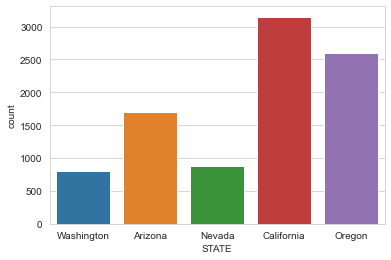

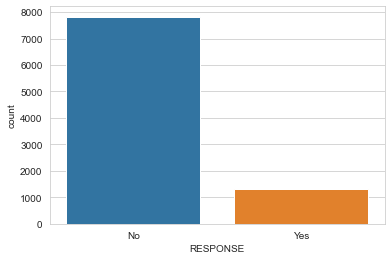

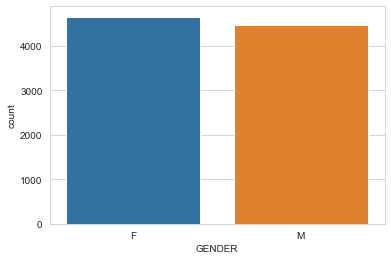

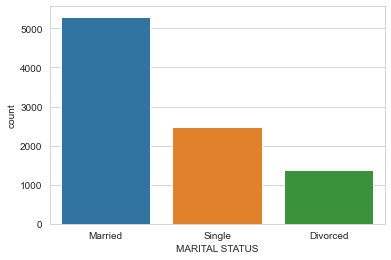

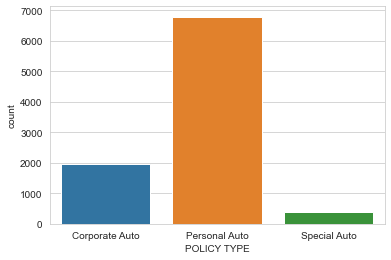

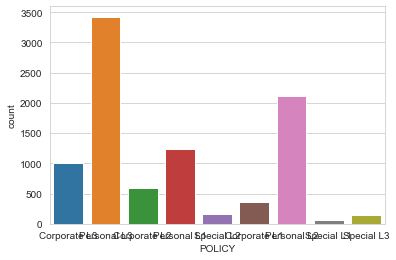

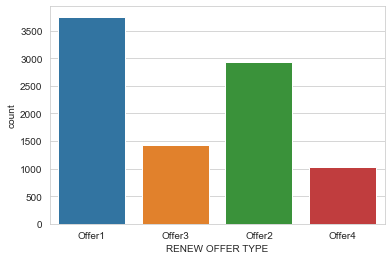

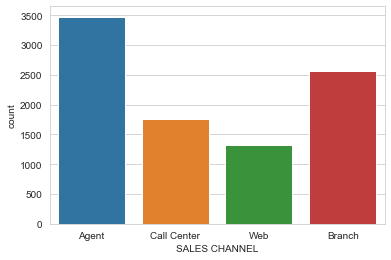

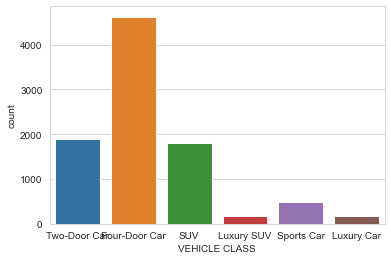

In [17]:
countplot(categoricals)

We should identify the ordinals and replace the values or get dummies for them.

<function matplotlib.pyplot.show(close=None, block=None)>

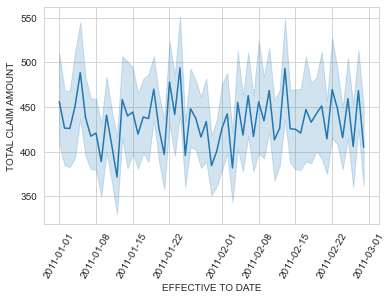

In [18]:
sns.lineplot(x = 'EFFECTIVE TO DATE', y = 'TOTAL CLAIM AMOUNT', data = data) 
plt.xticks(rotation=60)
plt.show

In [19]:
# We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
# Use the one you feel more comfortable with, define a function for that. 
# Use the function to remove the outliers and apply it to the dataframe.



In [20]:
from scipy.stats import skew

def skew_check(data):  
    
    columns = list(data.columns)
    
    high_skew = []
    
    for c in columns:
        skew = data[c].skew() 
        
        #print(c, ' , ', skew)
        
        if skew > 2:
            
            high_skew.append(c)
    
    print('High skews: ', high_skew)
    
    return high_skew

In [21]:
high_skew = skew_check(numericals)

High skews:  ['CUSTOMER LIFETIME VALUE', 'MONTHLY PREMIUM AUTO', 'NUMBER OF OPEN COMPLAINTS']


In [22]:
numericals.isin([' ', '0', 0, '', np.nan]).sum()

CUSTOMER LIFETIME VALUE             0
COVERAGE                            0
EDUCATION                           0
EMPLOYMENTSTATUS                 3436
INCOME                           2317
LOCATION CODE                    1582
MONTHLY PREMIUM AUTO                0
MONTHS SINCE LAST CLAIM           314
MONTHS SINCE POLICY INCEPTION      83
NUMBER OF OPEN COMPLAINTS        7252
NUMBER OF POLICIES                  0
TOTAL CLAIM AMOUNT                  0
VEHICLE SIZE                        0
dtype: int64

In [23]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN


In [24]:
numericals['CUSTOMER LIFETIME VALUE'] = list(map(log_transform_clean, numericals['CUSTOMER LIFETIME VALUE']))
numericals['MONTHLY PREMIUM AUTO'] = list(map(log_transform_clean, numericals['MONTHLY PREMIUM AUTO']))

In [25]:
#Create a copy of the dataframe for the data wrangling.

df = pd.concat([numericals, categoricals, data['EFFECTIVE TO DATE']], axis = 1)
df.head()

,CUSTOMER LIFETIME VALUE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,INCOME,LOCATION CODE,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,...,STATE,RESPONSE,GENDER,MARITAL STATUS,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,EFFECTIVE TO DATE
CUSTOMER,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,1,3,1,56274,1,4.234107,32,5,0,...,Washington,No,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,2011-02-24
QZ44356,8.850738,2,3,0,0,1,4.543295,13,42,0,...,Arizona,No,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,2011-01-31
AI49188,9.464008,3,3,1,48767,1,4.682131,18,38,0,...,Nevada,No,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,2011-02-19
WW63253,8.941920,1,3,0,0,1,4.663439,18,65,0,...,California,No,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,2011-01-20
HB64268,7.942253,1,3,1,43836,2,4.290459,12,44,0,...,Washington,No,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,2011-02-03


In [26]:
col = list(data.columns)
col

['STATE',
 'CUSTOMER LIFETIME VALUE',
 'RESPONSE',
 'COVERAGE',
 'EDUCATION',
 'EFFECTIVE TO DATE',
 'EMPLOYMENTSTATUS',
 'GENDER',
 'INCOME',
 'LOCATION CODE',
 'MARITAL STATUS',
 'MONTHLY PREMIUM AUTO',
 'MONTHS SINCE LAST CLAIM',
 'MONTHS SINCE POLICY INCEPTION',
 'NUMBER OF OPEN COMPLAINTS',
 'NUMBER OF POLICIES',
 'POLICY TYPE',
 'POLICY',
 'RENEW OFFER TYPE',
 'SALES CHANNEL',
 'TOTAL CLAIM AMOUNT',
 'VEHICLE CLASS',
 'VEHICLE SIZE']

In [27]:
df = df[['STATE',
 'CUSTOMER LIFETIME VALUE',
 'RESPONSE',
 'COVERAGE',
 'EDUCATION',
 'EFFECTIVE TO DATE',
 'EMPLOYMENTSTATUS',
 'GENDER',
 'INCOME',
 'LOCATION CODE',
 'MARITAL STATUS',
 'MONTHLY PREMIUM AUTO',
 'MONTHS SINCE LAST CLAIM',
 'MONTHS SINCE POLICY INCEPTION',
 'NUMBER OF OPEN COMPLAINTS',
 'NUMBER OF POLICIES',
 'POLICY TYPE',
 'POLICY',
 'RENEW OFFER TYPE',
 'SALES CHANNEL',
 'TOTAL CLAIM AMOUNT',
 'VEHICLE CLASS',
 'VEHICLE SIZE']]


In [28]:
def diff_function(data):
        df_cat = pd.DataFrame()
        df_cont = pd.DataFrame()
        df_disc = pd.DataFrame()
        
        for i in data:  
        
            if np.dtype(data[i]) == 'object':
                df_cat[i] = data[i]
        
            elif len(data[i].unique()) > 50 or np.dtype(data[i]) == 'float':  #(len(data[i].unique())*0.8):
                df_cont[i] = data[i]
        
            else: 
                df_disc[i] = data[i]

        return df_cat, df_cont, df_disc

In [29]:
df_cat, df_cont, df_disc = diff_function(df)

In [30]:
# Normalize the continuous variables. You can use any one method you want.

df_disc['MONTHS SINCE POLICY INCEPTION'] = df_cont['MONTHS SINCE POLICY INCEPTION']

df_cont.drop(['EFFECTIVE TO DATE', 'MONTHS SINCE POLICY INCEPTION'] , axis = 1, inplace = True)

In [31]:
df_cont

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,TOTAL CLAIM AMOUNT
CUSTOMER,,,,
BU79786,7.924260,56274,4.234107,384.811147
QZ44356,8.850738,0,4.543295,1131.464935
AI49188,9.464008,48767,4.682131,566.472247
WW63253,8.941920,0,4.663439,529.881344
HB64268,7.942253,43836,4.290459,138.130879
...,...,...,...,...
LA72316,10.060747,71941,4.290459,198.234764
PK87824,8.038031,21604,4.369448,379.200000
TD14365,9.007476,0,4.442651,790.784983


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

transformer = MinMaxScaler().fit(df_cont)
df_cont_standardized = pd.DataFrame(transformer.transform(df_cont), columns = df_cont.columns, index = df_cont.index)
df_cont_standardized

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,TOTAL CLAIM AMOUNT
CUSTOMER,,,,
BU79786,0.099340,0.562847,0.077690,0.132974
QZ44356,0.344314,0.000000,0.272611,0.391051
AI49188,0.506471,0.487763,0.360138,0.195764
WW63253,0.368424,0.000000,0.348354,0.183117
HB64268,0.104098,0.438443,0.113216,0.047710
...,...,...,...,...
LA72316,0.664257,0.719547,0.113216,0.068485
PK87824,0.129423,0.216081,0.163013,0.131034
TD14365,0.385758,0.000000,0.209162,0.273297


In [33]:
# Encode the categorical variables

df_cat_encoded = pd.get_dummies(df_cat, drop_first = True)
df_cat_encoded


,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RESPONSE_Yes,GENDER_M,MARITAL STATUS_Married,MARITAL STATUS_Single,POLICY TYPE_Personal Auto,POLICY TYPE_Special Auto,...,RENEW OFFER TYPE_Offer3,RENEW OFFER TYPE_Offer4,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car
CUSTOMER,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
PK87824,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TD14365,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
# The time variable can be useful. 
# Try to transform its data into a useful one. 
# Hint: Day week and month as integers might be useful

df['DAY'] = data['EFFECTIVE TO DATE'].apply(lambda x: x.day)
df['WEEK'] = data['EFFECTIVE TO DATE'].apply(lambda x: x.week)
df['MONTH'] = data['EFFECTIVE TO DATE'].apply(lambda x: x.month)
df['YEAR'] = data['EFFECTIVE TO DATE'].apply(lambda x: x.year)
df.drop('EFFECTIVE TO DATE', axis = 1, inplace = True)

In [35]:
# Since the model will only accept numerical data, check and make sure that every column is numerical, 
# if some are not, change it using encoding.

cat = list(df_cat.columns)
cont = list(df_cont_standardized)
to_replace = cat + cont
df.drop(to_replace, axis = 1, inplace = True)
df = pd.concat([df, df_cont_standardized, df_cat_encoded], axis = 1)

In [36]:
for i in df.columns:
    if i not in data.columns:
        print(i)


DAY
WEEK
MONTH
YEAR
STATE_California
STATE_Nevada
STATE_Oregon
STATE_Washington
RESPONSE_Yes
GENDER_M
MARITAL STATUS_Married
MARITAL STATUS_Single
POLICY TYPE_Personal Auto
POLICY TYPE_Special Auto
POLICY_Corporate L2
POLICY_Corporate L3
POLICY_Personal L1
POLICY_Personal L2
POLICY_Personal L3
POLICY_Special L1
POLICY_Special L2
POLICY_Special L3
RENEW OFFER TYPE_Offer2
RENEW OFFER TYPE_Offer3
RENEW OFFER TYPE_Offer4
SALES CHANNEL_Branch
SALES CHANNEL_Call Center
SALES CHANNEL_Web
VEHICLE CLASS_Luxury Car
VEHICLE CLASS_Luxury SUV
VEHICLE CLASS_SUV
VEHICLE CLASS_Sports Car
VEHICLE CLASS_Two-Door Car


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COVERAGE                       9134 non-null   int64  
 1   EDUCATION                      9134 non-null   int64  
 2   EMPLOYMENTSTATUS               9134 non-null   int64  
 3   LOCATION CODE                  9134 non-null   int64  
 4   MONTHS SINCE LAST CLAIM        9134 non-null   int64  
 5   MONTHS SINCE POLICY INCEPTION  9134 non-null   int64  
 6   NUMBER OF OPEN COMPLAINTS      9134 non-null   int64  
 7   NUMBER OF POLICIES             9134 non-null   int64  
 8   VEHICLE SIZE                   9134 non-null   int64  
 9   DAY                            9134 non-null   int64  
 10  WEEK                           9134 non-null   int64  
 11  MONTH                          9134 non-null   int64  
 12  YEAR                           9134 non-null

In [38]:
# In this final lab, we will model our data. 
# Import sklearn train_test_split and separate the data.

In [44]:
X = df.drop('TOTAL CLAIM AMOUNT', axis = 1)
y = df['TOTAL CLAIM AMOUNT']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [46]:
# Try a simple linear regression with all the data to see whether we are getting good results.

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
predictions_df = pd.DataFrame(predictions,columns=["TOTAL CLAIM AMOUNT"])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.04
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.06
The R2 of the model in the test set is: 0.61


In [151]:
# Great! Now define a function that takes a list of models and train (and tests) them 
# so we can try a lot of them without repeating code.


def models(data, target, mode, k = 5, test_size=0.3, multiclass = 'multinomial', p = 2):
    
    # X - y split
    
    X = data.drop(target, axis = 1)
    y = data[target]
   
    # Train Test Split
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=100)
    
    
    # Linear model
    if mode == 'linear_model':
        
        from sklearn import linear_model

        lm = linear_model.LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions  = lm.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])
      
    
    # K NeighborsRegressor    
    elif mode == 'k-nn':
        
        from sklearn.neighbors import KNeighborsRegressor
        
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])
        
    # Logistic Model
    elif mode == 'logistic':
        
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import cohen_kappa_score
        
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class=multiclass).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(model.predict(X_test))
        
        print("The accuracy of the model in the TEST set is: ", round(model.score(X_test, y_test),2))
        print("The kappa of the model is: ", cohen_kappa_score(y,model.predict(X)))
        
    # Polynomial Regression    
    elif mode == "polynomial":
        
        from sklearn.linear_model import Ridge
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.pipeline import make_pipeline
        
        model = make_pipeline(PolynomialFeatures(p), Ridge()).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])
    
    
    
    else : print('Something went wrong.')
        
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    
    list_error_metrics = [MAE, MSE, RMSE, R2]

    print("\nThe mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    
    sns.scatterplot(y = predictions, x = y_test)
    
    return predictions, predictions_df, model, list_error_metrics




The mean absolute error of the model in the test set is:   0.04
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.06
The R2 of the model in the test set is: 0.68


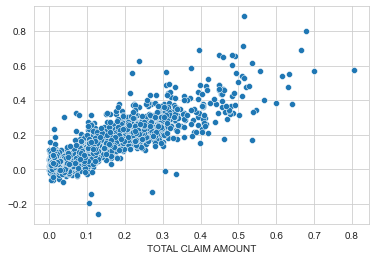

In [153]:
predictions, predictons_df, model, list_error_metrics = models(df, 'TOTAL CLAIM AMOUNT', 'polynomial', p=3)

In [132]:
list_error_metrics

[0.2159795695001824,
 0.2159795695001824,
 0.46473602130691616,
 0.07672314416841064]

In [ ]:
#Use the function to check LinearRegressor and KNeighborsRegressor.

In [122]:
predictions, predictons_df, model = models(df, 'TOTAL CLAIM AMOUNT', 'linear_model')

The mean absolute error of the model in the test set is:   0.04
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.06
The R2 of the model in the test set is: 0.61


In [126]:
predictions, predictons_df, model = models(df, 'TOTAL CLAIM AMOUNT', 'k-nn', k = 2)

The mean absolute error of the model in the test set is:   0.08
The mean squared error of the model in the test set is:   0.01
The root mean squared error of the model in the test set is:   0.11
The R2 of the model in the test set is: -0.31


In [ ]:
# You can check also the MLPRegressor for this task!

In [148]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

predictions = model.predict(X_test)

# model.score(X_test, y_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)
    
print("\nThe mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))


The mean absolute error of the model in the test set is:   0.07
The mean squared error of the model in the test set is:   0.01
The root mean squared error of the model in the test set is:   0.08
The R2 of the model in the test set is: 0.25
